In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = "../../all_datasets/Regression/1.01. Simple linear regression.csv"
data = pd.read_csv(path)

data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [14]:
# visualizing dataset
def plot_data(data):
    plt.scatter(data['SAT'], data['GPA'])

<AxesSubplot:xlabel='GPA'>

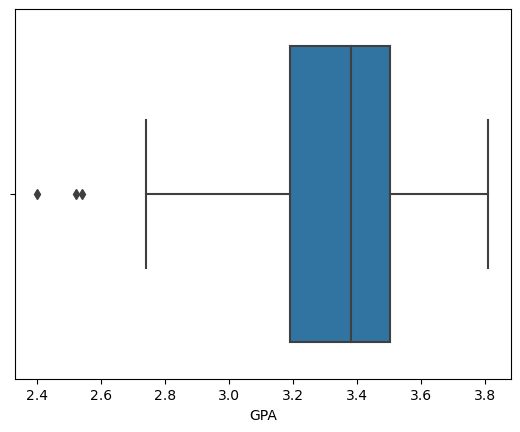

In [8]:
sns.boxplot(x=data['GPA'])

In [20]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers = (data > upper_threshold) | (data < lower_threshold)
    print(f'Number of outliers\n{outliers.sum()}')

    return outliers

In [10]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers = (data > upper_threshold) | (data < lower_threshold)
print(f'Number of outliers\n{outliers.sum()}')

Number of outliers
SAT    0
GPA    3
dtype: int64


In [12]:
cleaned_data = data[~outliers.any(axis=1)]
print(f'Data before cleaning: {data.shape}')
print(f'Data after cleaning: {cleaned_data.shape}')

Data before cleaning: (84, 2)
Data after cleaning: (81, 2)


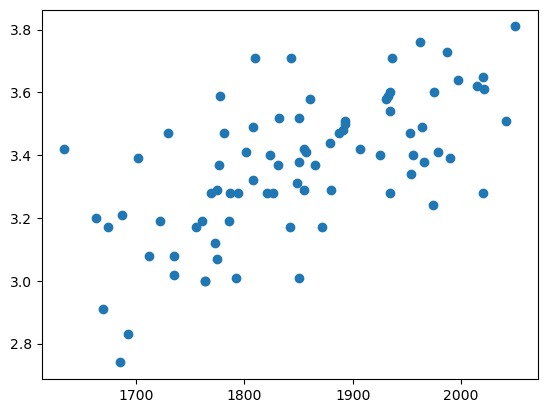

In [15]:
plot_data(cleaned_data)

<AxesSubplot:xlabel='GPA'>

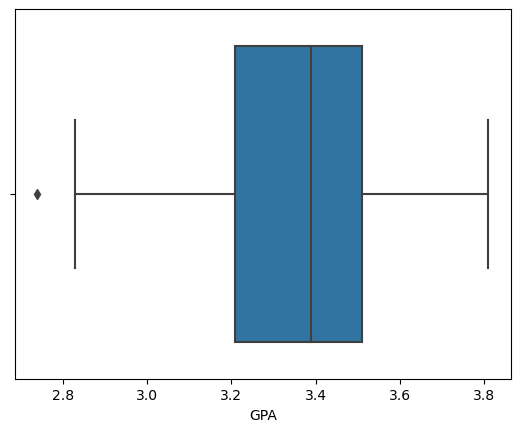

In [16]:
sns.boxplot(x=cleaned_data['GPA'])

In [21]:
outliers = find_outliers(cleaned_data)

Number of outliers
SAT    0
GPA    1
dtype: int64


In [22]:
cleaned_data = cleaned_data[~outliers.any(axis=1)]
cleaned_data.shape

(80, 2)

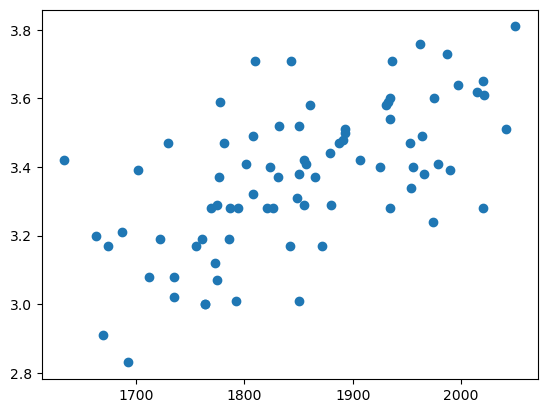

In [23]:
plot_data(cleaned_data)

In [24]:
outliers = find_outliers(cleaned_data)

Number of outliers
SAT    0
GPA    0
dtype: int64


### Model Training

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
x = cleaned_data[['SAT']]
y = cleaned_data['GPA']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(x_test)

In [35]:
coefficients = model.coef_
y_intercept = model.intercept_

In [36]:
from sklearn import metrics

In [37]:
mse = metrics.mean_squared_error(y_test, y_pred=y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2score = metrics.r2_score(y_test, y_pred)
rss = ((y_pred - y_test)**2).sum()



In [38]:
# Display coefficients and intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {y_intercept}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2score}")

Coefficients: [0.0012264]
Intercept: 1.0998651703905393
Mean Squared Error: 0.022218721024569968
Mean Absolute Error: 0.10805505255396813
Residual Sum of Squares: 0.3554995363931195
R-Squared Score: 0.37343108809320213


In [41]:
model.score(x_test, y_test)

0.37343108809320213

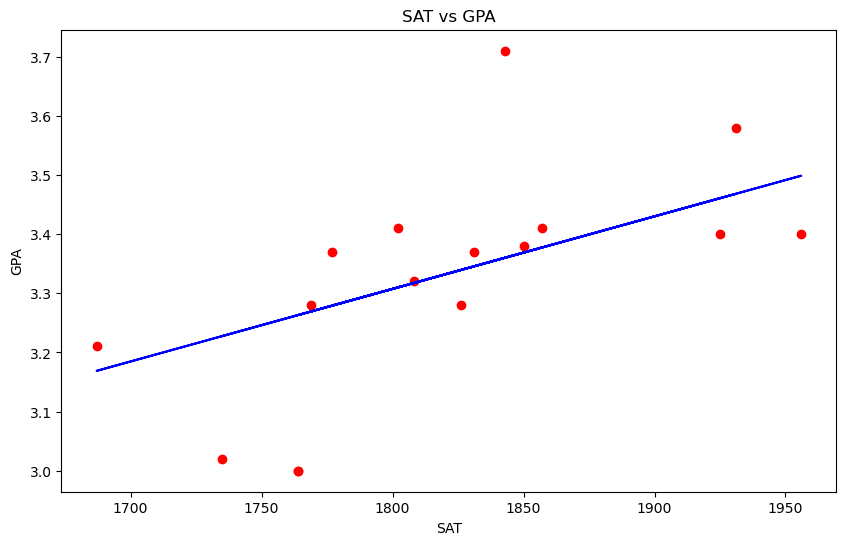

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test.values, y_pred, color='blue') 
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

In [50]:
to_predict = [['1714']]
model.predict(to_predict)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mansi\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([3.20190868])